In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('/content/dataset_website.csv')

In [ ]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.shape

(11055, 32)

In [ ]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [ ]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ccbb0dc90>,
      dtype=object)

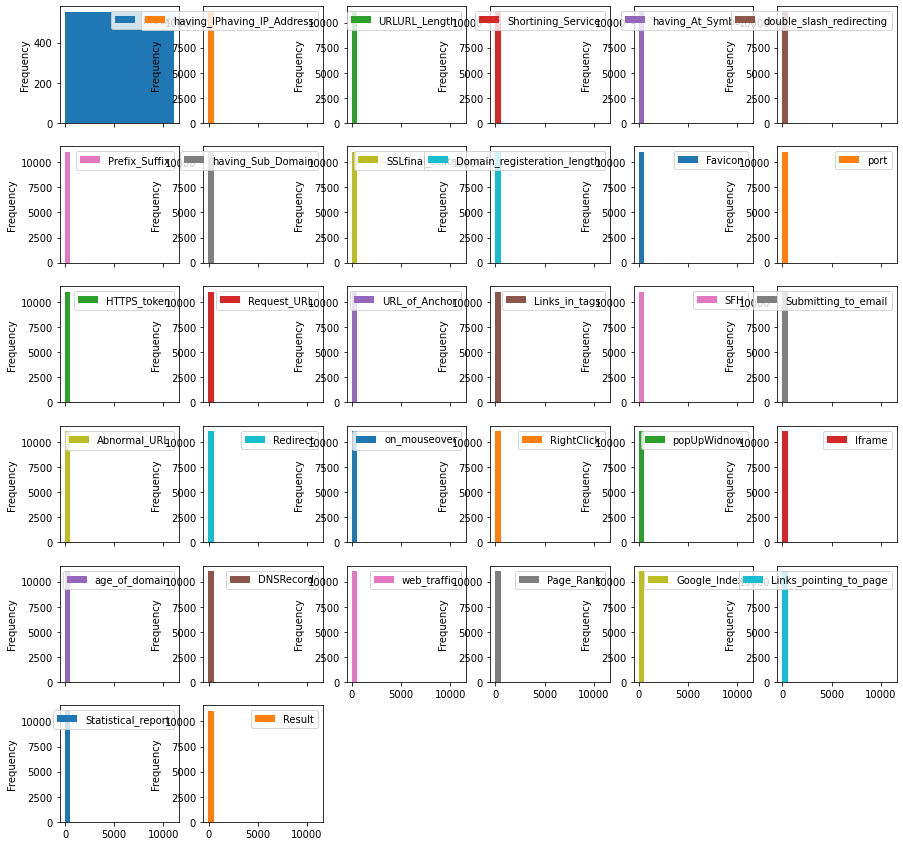

In [ ]:
df.plot.hist(subplots=True,layout=(6,6),figsize=(15, 15), bins=20)

#Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
X= df.drop(columns='Result')
X.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=10)

In [ ]:
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 6633 samples.
Testing set has 4422 samples.


#Lets apply Logistic Regression and check its accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#Model Training

In [ ]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Model Testing

In [ ]:
logreg_predict= model_1.predict(test_X)

In [ ]:
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,test_Y))

The accurcy of Logistic Regression Model is :  92.51469923111713


In [ ]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.91      1867
           1       0.94      0.92      0.93      2555

    accuracy                           0.93      4422
   macro avg       0.92      0.93      0.92      4422
weighted avg       0.93      0.93      0.93      4422



In [ ]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

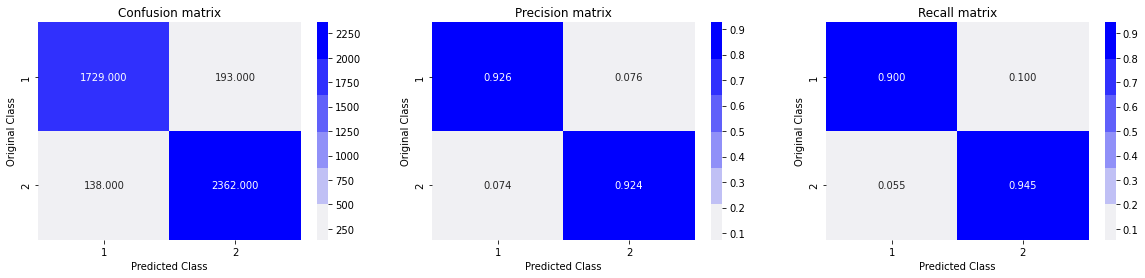

In [ ]:
plot_confusion_matrix(test_Y, logreg_predict)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


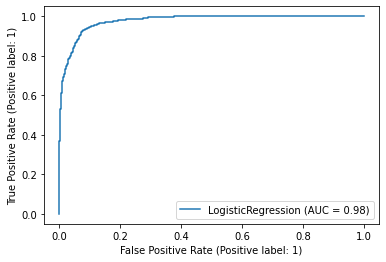

In [ ]:
plot_roc_curve(model_1,test_X, test_Y)

In [ ]:
import pickle
pickle.dump(logreg,open('Phishing_website.pk1','wb'))

#K-Nearest Neighbors Classifier and check its accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Model Training
#KNN Classifier for K = 1

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
model_2= knn.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn_predict=model_2.predict(test_X)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,test_Y))

The accuracy of KNN Model is:  66.16915422885572


In [ ]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.60      0.66      0.63      1922
           1       0.72      0.67      0.69      2500

    accuracy                           0.66      4422
   macro avg       0.66      0.66      0.66      4422
weighted avg       0.67      0.66      0.66      4422



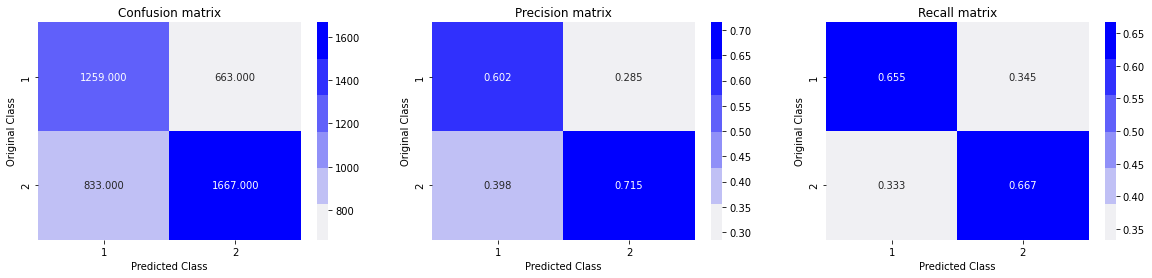

In [ ]:
plot_confusion_matrix(test_Y, knn_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


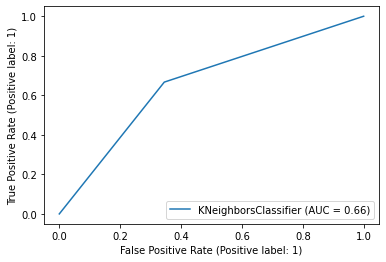

In [ ]:
plot_roc_curve(model_2,test_X, test_Y)

In [ ]:
import pickle
pickle.dump(knn,open('Phishing_website.pk1','wb'))

#Decision Tree Classifier and check its classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [ ]:
dtree_predict=model_3.predict(test_X)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y))

The accuracy of Decision Tree Classifier is:  94.86657620985979


In [ ]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1915
           1       0.96      0.95      0.95      2507

    accuracy                           0.95      4422
   macro avg       0.95      0.95      0.95      4422
weighted avg       0.95      0.95      0.95      4422



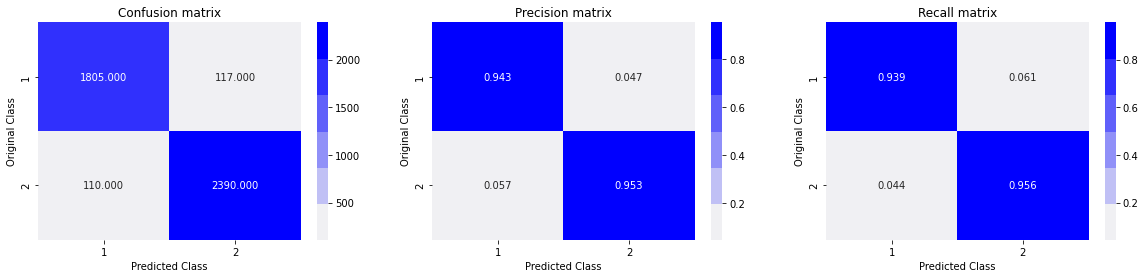

In [ ]:
plot_confusion_matrix(test_Y, dtree_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


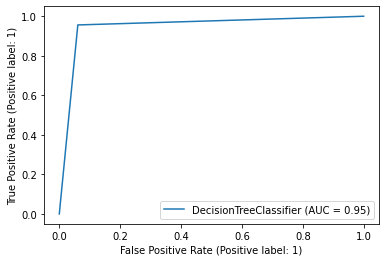

In [ ]:
plot_roc_curve(model_3,test_X, test_Y)

In [ ]:
import pickle
pickle.dump(dtree,open('Phishing_website.pk1','wb'))

#Random Forest Classifier and check its accuracy


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
rfc_predict=model_4.predict(test_X)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))

The accuracy of Random Forest Classifier is:  96.99231117141565


In [ ]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1897
           1       0.98      0.97      0.97      2525

    accuracy                           0.97      4422
   macro avg       0.97      0.97      0.97      4422
weighted avg       0.97      0.97      0.97      4422



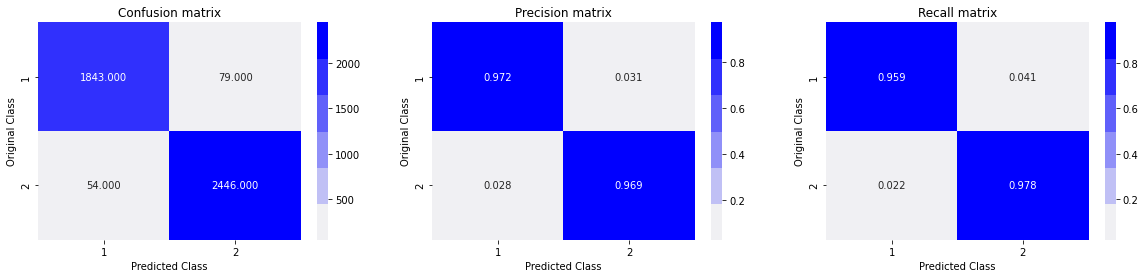

In [ ]:
plot_confusion_matrix(test_Y, rfc_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


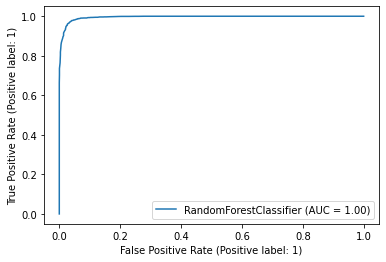

In [ ]:
plot_roc_curve(model_4,test_X, test_Y)

In [ ]:
import pickle
pickle.dump(rfc,open('Phishing_website.pk1','wb'))

``#SVM and check its accuracy


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_predict=model_5.predict(test_X)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,test_Y))

The accuracy of SVM Classifier is:  56.53550429669833


In [ ]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.57      0.72      4422

    accuracy                           0.57      4422
   macro avg       0.50      0.28      0.36      4422
weighted avg       1.00      0.57      0.72      4422



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


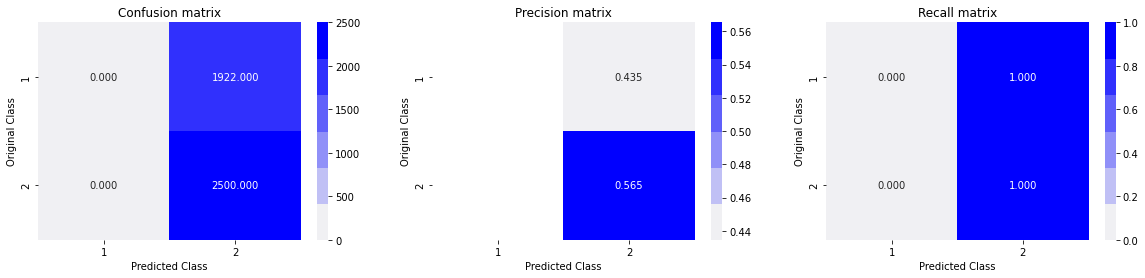

In [ ]:
plot_confusion_matrix(test_Y, svm_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


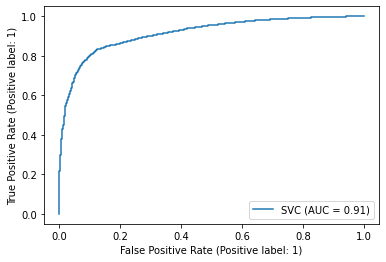

In [ ]:
plot_roc_curve(model_5,test_X, test_Y)

In [ ]:
import pickle
pickle.dump(svc,open('Phishing_website.pk1','wb'))

In [ ]:
print('Logistic Regression Accuracy:',100 * accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',100* accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',100* accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',100*accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',100*accuracy_score(svm_predict,test_Y))

Logistic Regression Accuracy: 92.51469923111713
K-Nearest Neighbour Accuracy: 66.16915422885572
Decision Tree Classifier Accuracy: 94.86657620985979
Random Forest Classifier Accuracy: 96.99231117141565
support Vector Machine Accuracy: 56.53550429669833


#From all the models we developed , Random Forest accuracy has highest accuracy .Lowest accuracy model is support Vector Machine 


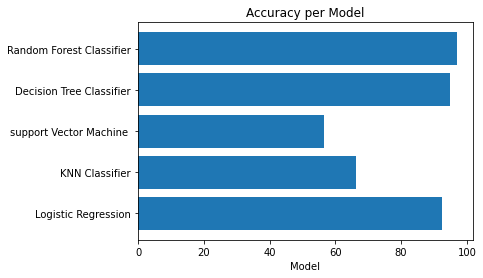

<Figure size 432x288 with 0 Axes>

In [ ]:
objects = ('Logistic Regression', 'KNN Classifier', 'support Vector Machine ','Decision Tree Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(objects))
performance = [92.51469923111713, 66.16915422885572,56.53550429669833 , 94.86657620985979,96.99231117141565]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy per Model')
plt.show()
plt.savefig('accuracy_per_model.png')

In [ ]:
import pickle
pickle.dump(svc,open('Phishing_website.pk1','wb'))